In [1]:
# Import Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
session = Session(engine)

In [8]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [9]:
results = []
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

), ('2014-12-10', 0.0), ('2014-12-11', 1.09), ('2014-12-12', 0.83), ('2014-12-13', 0.0), ('2014-12-14', 1.75), ('2014-12-15', 0.55), ('2014-12-16', 0.58), ('2014-12-17', 0.8), ('2014-12-18', 0.21), ('2014-12-19', 0.51), ('2014-12-21', None), ('2014-12-22', 0.59), ('2014-12-23', 4.03), ('2014-12-24', 0.4), ('2014-12-25', 0.03), ('2014-12-26', 0.0), ('2014-12-27', 0.0), ('2014-12-28', 0.0), ('2014-12-29', 0.0), ('2015-01-01', None), ('2015-01-02', 0.02), ('2015-01-03', 0.85), ('2015-01-04', 0.02), ('2015-01-05', 0.0), ('2015-01-06', 0.06), ('2015-01-07', 0.0), ('2015-01-08', 0.0), ('2015-01-09', 0.0), ('2015-01-11', None), ('2015-01-12', 0.03), ('2015-01-13', 0.01), ('2015-01-14', 0.0), ('2015-01-15', 0.0), ('2015-01-16', 0.01), ('2015-01-17', 0.0), ('2015-01-18', 0.0), ('2015-01-19', 0.0), ('2015-01-20', 0.01), ('2015-01-21', 0.0), ('2015-01-22', 0.0), ('2015-01-23', 0.0), ('2015-01-24', 0.22), ('2015-01-25', 0.33), ('2015-01-26', 0.29), ('2015-01-31', None), ('2015-02-02', None), ('201

In [10]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

, ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.16), ('2016-12-18', 0.27), ('2016-12-19', 0.02), ('2016-12-20', 0.01), ('2016-12-21', 0.06), ('2016-12-22', 0.14), ('2016-12-23', 0.02), ('2016-12-24', 0.06), ('2016-12-25', 0.0), ('2016-12-26', 0.06), ('2016-12-27', 0.0), ('2016-12-28', 0.06), ('2016-12-29', 0.05), ('2016-12-30', 0.07), ('2017-01-01', None), ('2017-01-03', None), ('2017-01-04', 0.18), ('2017-01-05', 0.42), ('2017-01-06', 0.01), ('2017-01-07', 0.0), ('2017-01-08', 0.0), ('2017-01-09', 0.0), ('2017-01-10', 0.0), ('2017-01-12', None), ('2017-01-15', None), ('2017-01-16', 0.0), ('2017-01-18', None), ('2017-01-19', 0.0), ('2017-01-20', 0.0), ('2017-01-21', 0.11), ('2017-01-22', 0.04), ('2017-01-23', 0.0), ('2017-01-24', 0.08), ('2017-01-25', 0.0), ('2017-01-26', 0.0), ('2017-01-27', 0.0), ('2017-01-29', None), ('2017-01-30', 0.0), ('2017-01-31', 0.0), ('2017-02-01', 0.0), ('2017-02-02', 0.0), ('2017-02-03', 0.0), ('2017-02-04', 0.0), ('2017-02-05', 0.0), ('2017-0

In [11]:
df = pd.DataFrame(results, columns=['date','percipitation'])
df

,date,percipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [12]:
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

7-10           0.00
 2017-07-11           0.00
 2017-07-12           0.00
 2017-07-13           0.11
 2017-07-14           0.00
 2017-07-15           0.00
 2017-07-16           0.00
 2017-07-17           0.00
 2017-07-18           0.00
 2017-07-19           0.00
 2017-07-20           0.33
 2017-07-21           0.00
 2017-07-22           0.00
 2017-07-24            NaN
 2017-07-25           0.05
 2017-07-26           0.00
 2017-07-27           0.00
 2017-07-28           0.00
 2017-07-29           0.00
 2017-07-30           0.00
 2017-07-31           0.00
 2017-08-01           0.00
 2017-08-02           0.00
 2017-08-03           0.00
 2017-08-04           0.00
 2017-08-06           0.00
 2017-08-07           0.00
 2017-08-08           0.00
 2017-08-10           0.00
 2017-08-11           0.00
 2017-08-12           0.00
 2017-08-13           0.00
 2017-08-14           0.08
 2017-08-15           0.06
 2017-08-16           0.07
 2017-08-17           0.05
 2017-08-19            NaN
 2017-08

In [13]:
df = df.sort_index()

In [14]:
print(df.to_string(index=False))

4-16           0.00
 2017-04-17           0.30
 2017-04-17           1.30
 2017-04-17           0.41
 2017-04-17            NaN
 2017-04-17           0.02
 2017-04-17            NaN
 2017-04-17           1.04
 2017-04-18           0.98
 2017-04-18           0.15
 2017-04-18           0.12
 2017-04-18           0.00
 2017-04-18           0.08
 2017-04-18           0.00
 2017-04-18           2.03
 2017-04-19           0.02
 2017-04-19           0.02
 2017-04-19            NaN
 2017-04-19           0.02
 2017-04-19           0.14
 2017-04-19           0.00
 2017-04-19           0.00
 2017-04-20           0.05
 2017-04-20           0.00
 2017-04-20           0.00
 2017-04-20           0.35
 2017-04-20           0.33
 2017-04-20            NaN
 2017-04-20           0.05
 2017-04-21           1.84
 2017-04-21           1.74
 2017-04-21           0.23
 2017-04-21           2.36
 2017-04-21            NaN
 2017-04-21           1.16
 2017-04-21           1.05
 2017-04-22           1.01
 2017-04

<AxesSubplot:xlabel='date'>

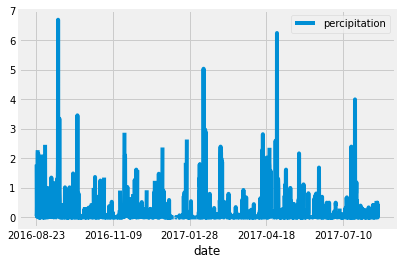

In [15]:
df.plot()

In [16]:
df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
